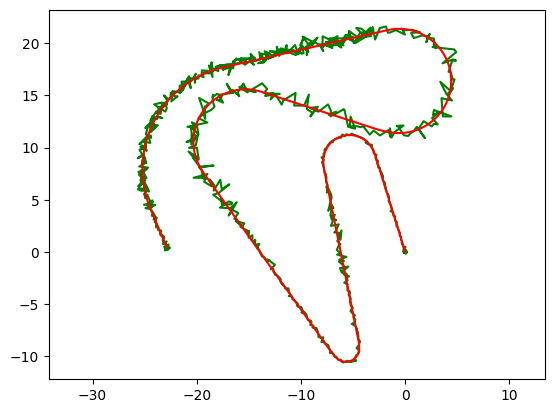

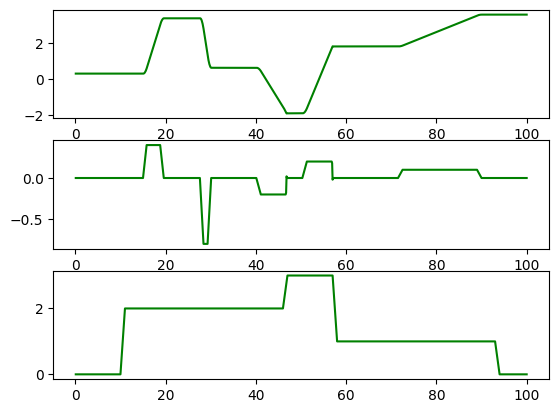

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D = 0.1
Ts = 0.1
vv = np.concatenate([np.zeros(100), np.arange(0.2, 2.2, 0.2), np.ones(350) * 2, 
                     np.arange(2.1, 3.1, 0.1), np.ones(100) * 3, np.arange(2.8, 0.8, -0.2), 
                     np.ones(350), np.arange(0.9, -0.1, -0.1), np.zeros(60)])
kk = np.concatenate([np.zeros(150), np.arange(0.05, 0.45, 0.05), np.ones(30) * 0.4, 
                     np.arange(0.35, -0.05, -0.05), np.zeros(80), np.arange(-0.1, -0.9, -0.1), 
                     np.ones(9) * -0.8, np.arange(-0.7, 0.1, 0.1), np.zeros(100), 
                     np.arange(-0.02, -0.22, -0.02), np.ones(55) * -0.2, np.arange(-0.18, 0.2, 0.2),
                     np.zeros(35), np.arange(0.02, 0.22, 0.02), np.ones(55) * 0.2, 
                     np.arange(0.18, -0.2, -0.2), np.zeros(145), np.arange(0.01, 0.11, 0.01), 
                     np.ones(165) * 0.1, np.arange(0.09, -0.01, -0.01), np.zeros(100)])

vl = vv / (1 - kk * 0.5 * D)
vr = vv / (1 + kk * 0.5 * D)
t = Ts * np.arange(1, len(vv) + 1)

xx, yy, aa = np.zeros_like(vv), np.zeros_like(vv), np.full_like(vv, 0.3)
sl, sr = np.full_like(vv, 0.0211), np.zeros_like(vv)

for k in range(1, len(vv)):
    xx[k] = xx[k-1] - vv[k-1] * Ts * np.sin(aa[k-1])
    yy[k] = yy[k-1] + vv[k-1] * Ts * np.cos(aa[k-1])
    aa[k] = aa[k-1] + vv[k-1] * Ts * kk[k-1]
    sl[k] = sl[k-1] + vl[k-1] * Ts
    sr[k] = sr[k-1] + vr[k-1] * Ts

sl = np.round(sl * 100) / 100
sr = np.round(sr * 100) / 100

s = 0.5 * (sl + sr)
aaa = (sl - sr) / D

Rxy = 1e-2 * np.concatenate([0.5 * np.ones((2, 200)), 5 * np.ones((2, 50)), 
                             np.ones((2, 100)), 5 * np.ones((2, 30)), 
                             20 * np.ones((2, 300)), 10 * np.ones((2, 220)), 
                             np.ones((2, 100))], axis=1)

# Generate the noise array with a shape of 1000x2
noise = np.random.randn(len(xx), 2) * np.sqrt(Rxy.T)

# Now, add the noise to the position data
y = np.vstack([xx, yy]).T + noise

# y = np.vstack([xx, yy]).T + np.random.randn(2, len(xx)) * np.sqrt(Rxy).T

time = t.reshape(-1, 1)
Pos_x, Pos_y = y[:, 0], y[:, 1]
GT_x, GT_y, GT_alpha, GT_Kr, GT_v = xx.reshape(-1, 1), yy.reshape(-1, 1), aa.reshape(-1, 1), kk.reshape(-1, 1), vv.reshape(-1, 1)

# Reshape all 1D arrays to 2D arrays for consistency
Pos_x_2d = Pos_x.reshape(-1, 1)
Pos_y_2d = Pos_y.reshape(-1, 1)
GT_x_2d = GT_x.reshape(-1, 1)
GT_y_2d = GT_y.reshape(-1, 1)
GT_alpha_2d = GT_alpha.reshape(-1, 1)
GT_Kr_2d = GT_Kr.reshape(-1, 1)
GT_v_2d = GT_v.reshape(-1, 1)

# Now stack the arrays horizontally
data = pd.DataFrame(np.hstack([time, Pos_x_2d, Pos_y_2d, GT_x_2d, GT_y_2d, GT_alpha_2d, GT_Kr_2d, GT_v_2d]), 
                    columns=['time', 'Pos_x', 'Pos_y', 'GT_x', 'GT_y', 'GT_alpha', 'GT_Kr', 'GT_v'])

data.to_csv('xy.csv', sep=',', index=False)

# Plotting
plt.figure(1)
plt.clf()
         
plt.plot(y[:, 0], y[:, 1], 'g-', xx, yy, 'r-')
plt.axis('equal')

plt.figure(2)
plt.clf()

plt.subplot(311)
plt.plot(t, aa, 'g')

plt.subplot(312)
plt.plot(t, kk, 'g')

plt.subplot(313)
plt.plot(t, vv, 'g')

plt.show()



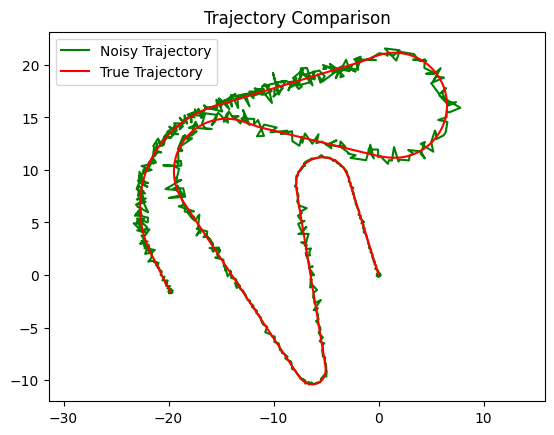

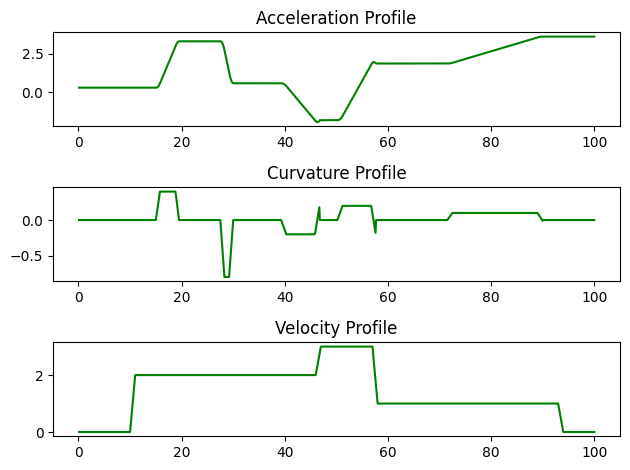

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
D = 0.1
Ts = 0.1

# Velocity and curvature profiles
velocity_profile = np.concatenate([np.zeros(100), np.linspace(0.2, 2, 10), np.full(350, 2), 
                                   np.linspace(2.1, 3, 10), np.full(100, 3), np.linspace(2.8, 1, 10), 
                                   np.ones(350), np.linspace(0.9, 0, 10), np.zeros(60)])

curvature_profile = np.concatenate([
    np.zeros(150), np.linspace(0.05, 0.4, 8), np.full(30, 0.4), 
    np.linspace(0.35, 0, 7), np.zeros(80), np.linspace(-0.1, -0.8, 8), 
    np.full(9, -0.8), np.linspace(-0.7, 0, 8), np.zeros(93), 
    np.linspace(-0.02, -0.2, 10), np.full(55, -0.2), np.linspace(-0.18, 0.18, 9),
    np.zeros(35), np.linspace(0.02, 0.2, 10), np.full(55, 0.2), 
    np.linspace(0.18, -0.18, 9), np.zeros(139), np.linspace(0.01, 0.1, 10), 
    np.full(165, 0.1), np.linspace(0.09, -0.01, 10), np.zeros(100)
])

# Left and right velocities
left_velocity = velocity_profile / (1 - curvature_profile * 0.5 * D)
right_velocity = velocity_profile / (1 + curvature_profile * 0.5 * D)

# Time array
time_array = Ts * np.arange(1, len(velocity_profile) + 1)

# Initialize arrays
x, y, alpha = np.zeros_like(velocity_profile), np.zeros_like(velocity_profile), np.full_like(velocity_profile, 0.3)
left_distance, right_distance = np.full_like(velocity_profile, 0.0211), np.zeros_like(velocity_profile)

# Update positions and angles
for i in range(1, len(velocity_profile)):
    x[i] = x[i-1] - velocity_profile[i-1] * Ts * np.sin(alpha[i-1])
    y[i] = y[i-1] + velocity_profile[i-1] * Ts * np.cos(alpha[i-1])
    alpha[i] = alpha[i-1] + velocity_profile[i-1] * Ts * curvature_profile[i-1]
    left_distance[i] = left_distance[i-1] + left_velocity[i-1] * Ts
    right_distance[i] = right_distance[i-1] + right_velocity[i-1] * Ts

# Round off distances
left_distance = np.round(left_distance * 100) / 100
right_distance = np.round(right_distance * 100) / 100

# Calculate s and aaa
s = 0.5 * (left_distance + right_distance)
aaa = (left_distance - right_distance) / D

# Generate noise
Rxy = 1e-2 * np.concatenate([0.5 * np.ones((2, 200)), 5 * np.ones((2, 50)), 
                             np.ones((2, 100)), 5 * np.ones((2, 30)), 
                             20 * np.ones((2, 300)), 10 * np.ones((2, 220)), 
                             np.ones((2, 100))], axis=1)
noise = np.random.randn(len(x), 2) * np.sqrt(Rxy.T)

# Position data with noise
position_data = np.vstack([x, y]).T + noise

# Time and positions
time_col = time_array.reshape(-1, 1)
positions = np.hstack([time_col, position_data, x.reshape(-1, 1), y.reshape(-1, 1), alpha.reshape(-1, 1),
                       curvature_profile.reshape(-1, 1), velocity_profile.reshape(-1, 1)])

# Create DataFrame and save to CSV
column_names = ['time', 'Pos_x', 'Pos_y', 'GT_x', 'GT_y', 'GT_alpha', 'GT_Kr', 'GT_v']
data_df = pd.DataFrame(positions, columns=column_names)
data_df.to_csv('xy.csv', sep=',', index=False)

# Plotting
plt.figure(1)
plt.clf()
plt.plot(position_data[:, 0], position_data[:, 1], 'g-', label='Noisy Trajectory')
plt.plot(x, y, 'r-', label='True Trajectory')
plt.axis('equal')
plt.legend()
plt.title('Trajectory Comparison')

plt.figure(2)
plt.clf()

# Plot accel, curvature, and velocity profiles
plt.subplot(311)
plt.plot(time_array, alpha, 'g')
plt.title('Acceleration Profile')

plt.subplot(312)
plt.plot(time_array, curvature_profile, 'g')
plt.title('Curvature Profile')

plt.subplot(313)
plt.plot(time_array, velocity_profile, 'g')
plt.title('Velocity Profile')

plt.tight_layout()
plt.show()

